# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset.iloc[:,1:2].values
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1), copy=True)
train_scaled = sc.fit_transform(training_set)
print(train_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [5]:
X_train=[]
y_train=[]
for i in range (60, 1258):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


### Reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

### Initialising the RNN

In [8]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=( X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(rate=0.2))

### Adding the output layer

In [13]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [14]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [15]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100

38/38 [==============================] - 8s 51ms/step - loss: 0.0345
Epoch 2/100
38/38 [==============================] - 2s 49ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 2s 49ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 2s 50ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 2s 50ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0037
Epoch 12/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0045
Epoch 13/100
38/38 [====

38/38 [==============================] - 2s 65ms/step - loss: 0.0013
Epoch 99/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0014
Epoch 100/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0014


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [16]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_google_price = dataset_test.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [21]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test=[]
for i in range (60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_google_price = regressor.predict(X_test)
predicted_google_price = sc.inverse_transform(predicted_google_price)

1/1 [==============================] - 1s 1s/step


In [22]:
print(predicted_google_price)

[[772.9842 ]
 [770.1255 ]
 [769.8311 ]
 [771.0126 ]
 [774.1991 ]
 [779.8129 ]
 [785.2288 ]
 [787.72797]
 [788.0739 ]
 [787.59045]
 [787.1634 ]
 [786.97144]
 [787.02124]
 [787.7048 ]
 [788.7451 ]
 [792.87823]
 [799.3632 ]
 [806.5892 ]
 [810.8574 ]
 [807.5153 ]]


### Visualising the results

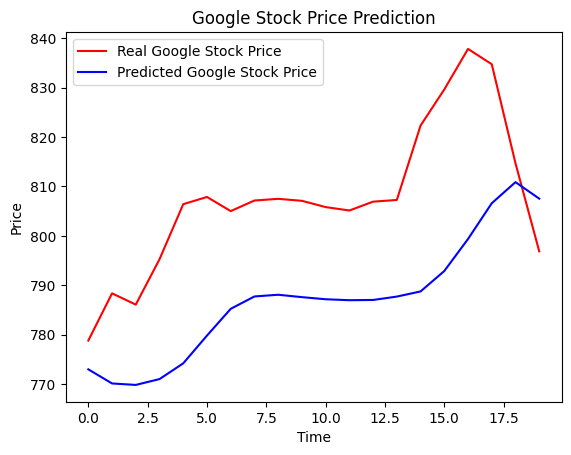

In [23]:
plt.plot(real_google_price, color='red', label= 'Real Google Stock Price')
plt.plot(predicted_google_price, color = 'blue', label='Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel("Price")
plt.legend()
plt.show()